In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
from algorithms.brusco import Brusco


def plot_core_periphery_graph(G, core_indices):
    # Get the node labels (strings) from the graph using the indices
    core_nodes = [list(G.nodes)[i] for i in core_indices]
    
    # Set node color: 'red' for core nodes and 'blue' for periphery nodes
    node_colors = ['red' if node in core_nodes else 'blue' for node in G.nodes]
    
    # Draw the graph
    pos = nx.spring_layout(G)  # spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=10, font_size=0, font_color='white')
    
    # Highlight core nodes with larger size
    nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='red', node_size=30)
    plt.show()

nodes = pd.read_csv("jean-complete-node.csv")
edges = pd.read_csv("jean-complete-edge.csv")

# 무방향 그래프 생성
G = nx.Graph()

for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'], description=row['Description'])

for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], id=row['Id'], label=row['Label'])

A = nx.to_numpy_array(G)
n = A.shape[0]

model = Brusco(G, A, n)
solution_brusco, solution_fitness_brusco, solution_idx_brusco = model.fit()


/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [3]:
solution_brusco

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [2]:
from algorithms.rossa import Rossa

print("*** Rossa")
rossa = Rossa(G)
alpha = rossa.get_alpha()
cp_centralization = rossa.get_cp_centralization()
z_score = rossa.calculate_z_score(num_randomizations=100)
core_nodes = rossa.extract_core_nodes(0.7)
#print("Alpha values:", alpha)
print("CP-Centralization:", cp_centralization)
print("Z-Score:", z_score)
print("Core nodes (threshold={}):".format(0.7), core_nodes)

print("-----------------------------")

*** Rossa
CP-Centralization: 0.7434216929567027
Z-Score: -1.2392141449217506
Core nodes (threshold=0.7): [25, 35, 80, 123, 144, 160, 169]
-----------------------------


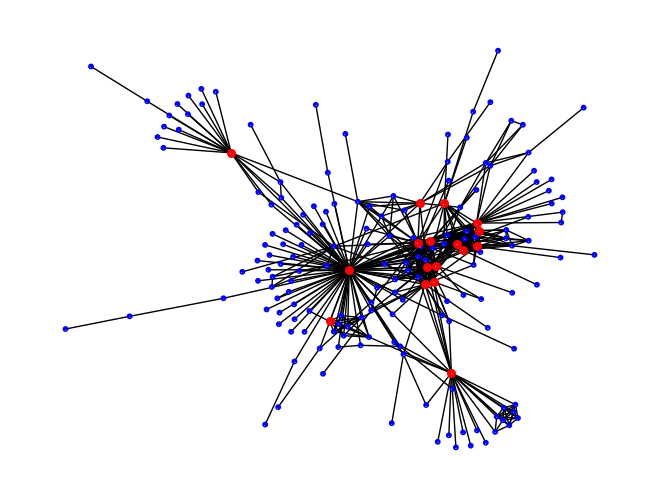

In [9]:
core_nodes = rossa.extract_core_nodes(0.5)
plot_core_periphery_graph(G, core_nodes)

In [14]:
from algorithms.ibd import IBD


ibd = IBD(G, A)
core_scores, core_nodes, pairs, c_pairs = ibd.run_influence_based_detection(gamma = 0.6)

print("Core scores:")
print(core_scores)
print("Core nodes:", core_nodes)
print("Core-periphery pairs:", pairs)

Converged after 19 iterations
Core scores:
[ 2.33657628  0.4720933   0.17594581  0.49156285  1.38646087  1.31352234
  1.37969532  0.12469917  0.22281556  2.0561419   0.13001773  0.27833711
  0.12469917  2.00773652  1.62168106  0.1024953   1.02706433  0.10504385
  0.2234929   0.30287572  0.27651581  0.17594581  0.30287572  0.38755593
  0.64374167  6.87876485  0.12469917  0.1007131   0.1638534   0.17594581
  0.47121725  0.88870699  0.51320812  1.20663876  1.00837146  6.72666299
  0.90637302  0.1638534   1.20526789  0.49156285  1.55640798  0.1638534
  0.17594581  0.1638534   1.00837146  0.17594581  1.80561312  2.59545979
  1.80601905  0.70819059  1.23706283  0.56354807  0.12469917  0.19133169
  0.17594581  0.12469917  0.17594581  0.63655505  0.17594581  0.27833711
  0.56207771  0.66252117  0.17594581  0.91504947  1.13010749  1.20663876
  0.13001773  0.17594581  0.17594581  0.35184865  1.09213231  0.47121725
  0.93206187  0.88870699  0.09297427  0.10946654  0.30287572  1.27609954
  2.46914

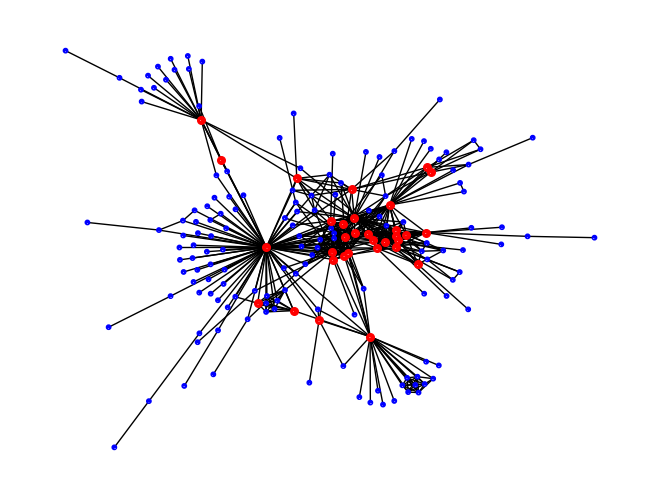

In [15]:
plot_core_periphery_graph(G, core_nodes)

In [ ]:
def holme_refresh(self, G, core_indices):
    """
    Refresh the core centrality based on a pre-computed set of core indices.
    Parameters:
    - G: the graph
    - core_indices: a list or array indicating core nodes (1 for core, 0 for non-core)
    
    Returns:
    - core centrality of the provided core indices
    """
    V = set(G.nodes)
    
    # Calculate closeness centrality for the entire graph
    C_C_V = self.closeness_centrality(G, V)
    
    if C_C_V == 0:
        return 0
    
    # If core_indices is an index-based array, convert it back to node identifiers
    node_list = list(G.nodes)
    core_nodes = [node_list[i] for i in range(len(core_indices)) if core_indices[i] == 1]
    
    # Calculate closeness centrality for the core nodes
    C_C_core = self.closeness_centrality(G, core_nodes)
    
    # Calculate and return the core centrality
    core_centrality = C_C_core / C_C_V
    return core_centrality

In [1]:
import requests

url = "https://mozart.diei.unipg.it/gdcontest/contest2018/got-graph.graphml"
response = requests.get(url, stream=True)

# 파일 저장
with open("got-graph.graphml", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            file.write(chunk)

print("파일 다운로드가 완료되었습니다.")

파일 다운로드가 완료되었습니다.
